In [11]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt

In [16]:
cap = cv2.VideoCapture('qiyueyuansheng.mp4')

In [17]:
fps = cap.get(cv2.CAP_PROP_FPS)
fps

25.0

## Extract frames ##

<IPython.core.display.Javascript object>


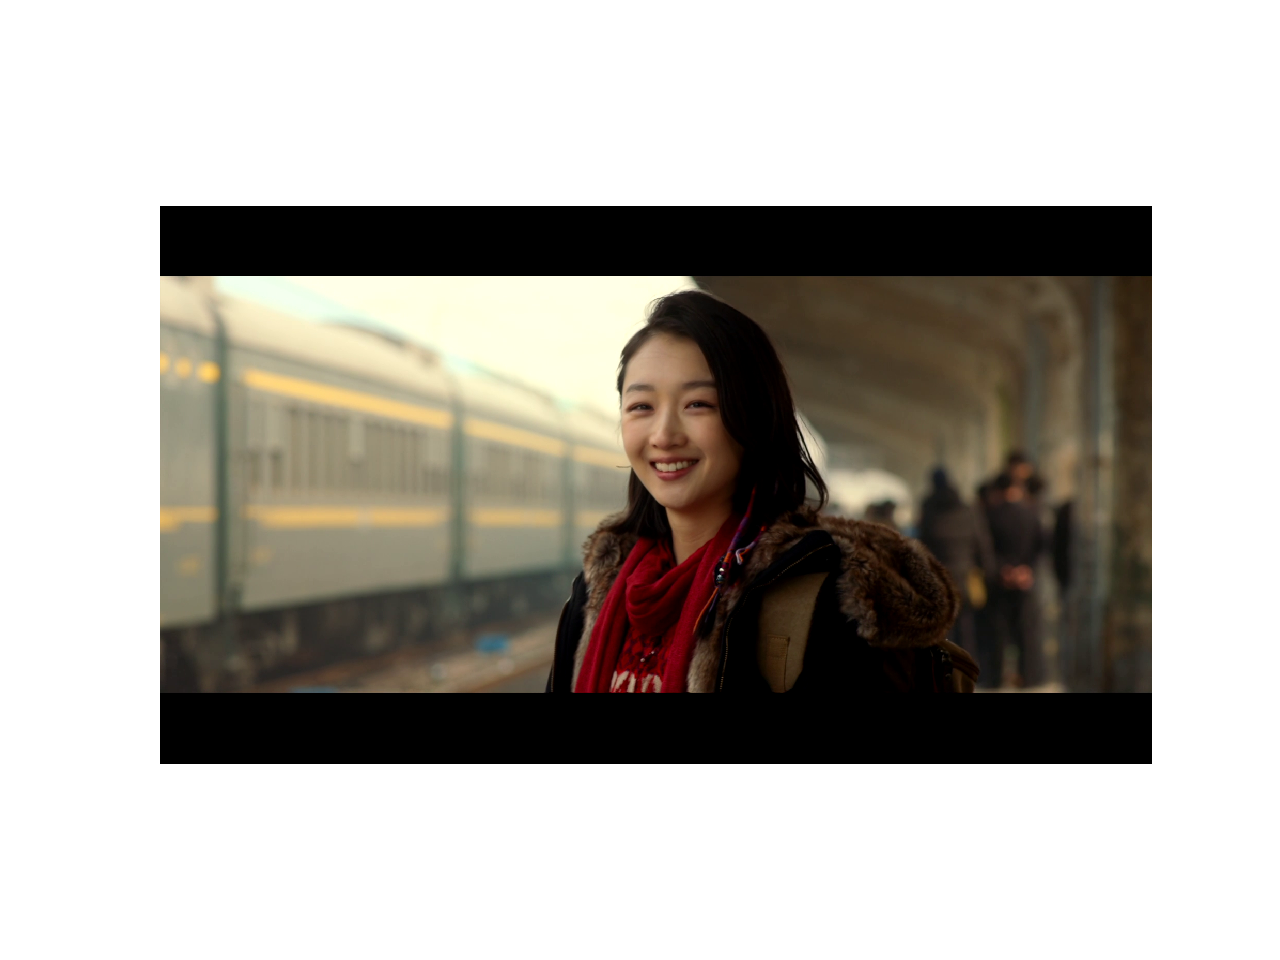

True

In [4]:
# 59:26:14 ~ 38:58
m = 77
s = 9
f = 4 # 0~24
frame_no = 25*(m*60+s) + f
cap.set(1,frame_no) # Where frame_no is the frame you want
ret, frame = cap.read() # Read the frame
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
plt.axis('off')
plt.imshow(img)
cv2.imwrite("frame_{}.jpg".format(frame_no), frame, [cv2.IMWRITE_JPEG_QUALITY,100])

In [31]:
int(cap.get(4))

1080

## Extract clips ##

In [18]:
def extract_clip(output_name, start_frame_list, end_frame_list, fps, frameSize):
    
    def get_frame_no(frame_list):
        return 25*(frame_list[0]*60+frame_list[1]) + frame_list[2]
    
    sf = get_frame_no(start_frame_list)
    ef = get_frame_no(end_frame_list)
    
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    writer = cv2.VideoWriter(output_name, fourcc, fps, frameSize)
    
    cap.set(1,sf)
    
    for frame in range(sf, ef+1):
        ret, frame = cap.read()
        if ret is True:
            writer.write(frame)
    writer.release()

In [19]:
extract_clip('output.mp4', [59,26,18],[59,28,10], int(cap.get(5)), (640,380))

## Convert to gif ##

In [69]:
import imageio
import os, sys

class TargetFormat(object):
    GIF = ".gif"
    MP4 = ".mp4"
    AVI = ".avi"

def convertFile(inputpath, targetFormat):
    """Reference: http://imageio.readthedocs.io/en/latest/examples.html#convert-a-movie"""
    outputpath = os.path.splitext(inputpath)[0] + targetFormat
    print("converting\r\n\t{0}\r\nto\r\n\t{1}".format(inputpath, outputpath))

    reader = imageio.get_reader(inputpath)
    fps = reader.get_meta_data()['fps']

    writer = imageio.get_writer(outputpath, fps=fps)
    for i,im in enumerate(reader):
        sys.stdout.write("\rframe {0}".format(i))
        sys.stdout.flush()
        writer.append_data(im)
    print("\r\nFinalizing...")
    writer.close()
    print("Done.")

In [70]:
convertFile("output.mp4", TargetFormat.GIF)

converting
	output.mp4
to
	output.gif


OSError: Could not load meta information
=== stderr ===

ffmpeg version 3.4 Copyright (c) 2000-2017 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/Users/mazhiyi/miniconda3/envs/cv --disable-doc --enable-shared --extra-cflags='-fPIC -I/Users/mazhiyi/miniconda3/envs/cv/include' --extra-cxxflags='=-fPIC' --extra-libs='-L/Users/mazhiyi/miniconda3/envs/cv/lib -lz' --enable-pic --disable-static --disable-gpl --disable-nonfree --disable-openssl --enable-libvpx --cc=x86_64-apple-darwin13.4.0-clang --cxx=x86_64-apple-darwin13.4.0-clang++ --enable-libopus
  libavutil      55. 78.100 / 55. 78.100
  libavcodec     57.107.100 / 57.107.100
  libavformat    57. 83.100 / 57. 83.100
  libavdevice    57. 10.100 / 57. 10.100
  libavfilter     6.107.100 /  6.107.100
  libswscale      4.  8.100 /  4.  8.100
  libswresample   2.  9.100 /  2.  9.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/Users/mazhiyi/Desktop/testExtraction/output.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2mp41
    encoder         : Lavf57.83.100
  Duration: 00:00:00.00, bitrate: N/A
Output #0, image2pipe, to 'pipe:':
Output file #0 does not contain any stream